<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modelling:-Introduction" data-toc-modified-id="Modelling:-Introduction-1">Modelling: Introduction</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2">Data</a></span><ul class="toc-item"><li><span><a href="#Splitting-data-into-features/target-variables" data-toc-modified-id="Splitting-data-into-features/target-variables-2.1">Splitting data into features/target variables</a></span><ul class="toc-item"><li><span><a href="#Removing-correlated-columns" data-toc-modified-id="Removing-correlated-columns-2.1.1">Removing correlated columns</a></span></li></ul></li></ul></li><li><span><a href="#Train/Test-Split" data-toc-modified-id="Train/Test-Split-3">Train/Test Split</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-4">PCA</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5">Logistic Regression</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-6">Decision Trees</a></span></li><li><span><a href="#Neural-Networks" data-toc-modified-id="Neural-Networks-7">Neural Networks</a></span></li><li><span><a href="#Adaptive-Boosting" data-toc-modified-id="Adaptive-Boosting-8">Adaptive Boosting</a></span></li><li><span><a href="#Extreme-Gradient-Boosting" data-toc-modified-id="Extreme-Gradient-Boosting-9">Extreme Gradient Boosting</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-10">Gradient Boosting</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Tuning--learning_rate" data-toc-modified-id="Tuning--learning_rate-10.0.1">Tuning  <code>learning_rate</code></a></span></li><li><span><a href="#Tuning-n_estimators" data-toc-modified-id="Tuning-n_estimators-10.0.2">Tuning <code>n_estimators</code></a></span></li><li><span><a href="#Tuning-max_depth" data-toc-modified-id="Tuning-max_depth-10.0.3">Tuning <code>max_depth</code></a></span></li><li><span><a href="#Tuning-min_samples_splits" data-toc-modified-id="Tuning-min_samples_splits-10.0.4">Tuning <code>min_samples_splits</code></a></span></li><li><span><a href="#Tuning-min_samples_leaf" data-toc-modified-id="Tuning-min_samples_leaf-10.0.5">Tuning <code>min_samples_leaf</code></a></span></li><li><span><a href="#Tuning-max_features" data-toc-modified-id="Tuning-max_features-10.0.6">Tuning <code>max_features</code></a></span></li></ul></li></ul></li><li><span><a href="#Making-Predictions" data-toc-modified-id="Making-Predictions-11">Making Predictions</a></span></li></ul></div>

## Modelling: Introduction

In this notebook, I will present various models I fitted to the data, as well as the findings and insights that came along with it.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [97]:
# Importing Data

data = pd.read_csv('model_data.csv', index_col=0)
print(f"Shape of data: {data.shape}")

Shape of data: (7202, 148)


In [98]:
data.head()

,name,review_count,FSA,price_range,take_out,success,Visible_Minority_Population_Pct,South_Asian_Pct,Chinese_Pct,Black_Pct,...,Japanese,Korean,Mexican,Misc,Non-Visible Minority Foods,South East Asian,Specialty,Vegetarian/Vegan,West Asian,avg_hours_in_week
0,Bakery Gateau,8,M3B,2,1,1,6495.0,1070.0,3310.0,185.0,...,0,0,0,0,0,0,0,0,0,11.000
1,Better than Yia Yia's,5,M3B,2,1,1,6495.0,1070.0,3310.0,185.0,...,0,0,0,0,0,0,0,0,1,12.000
2,Spoon And Fork Plus,165,M3B,2,1,0,6495.0,1070.0,3310.0,185.0,...,0,0,0,0,0,1,0,0,0,10.786
3,California Sandwiches,36,M3B,2,1,1,6495.0,1070.0,3310.0,185.0,...,0,0,0,0,0,0,0,0,0,9.429
4,Mamma's Pizza,11,M3B,2,1,0,6495.0,1070.0,3310.0,185.0,...,0,0,0,0,1,0,0,0,0,11.714


### Splitting data into features/target variables

As mentioned before, `success` will be my target variable, and I will be fitting binary classification models.

In [99]:
# Keeping numeric columns only
model_data = data.drop(columns = ['FSA', 'name'])

# Defining feature and target variable
X = model_data.drop(columns = ['success'])
y = model_data['success']

#### Removing correlated columns

In [114]:
# Finding columns that are correlated with each other
correlated_features = set()
correlation_matrix = data.corr()


for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        # Threshhold for correlation: 0.8
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
            
print(correlated_features)

{'Korean_Pct', 'Age:40-59', 'Age:60plus', 'Immigrants', 'NonImmigrants', 'Chinese_Pct', 'M2N', 'Commute:Walk_Bus_Bike', 'Commute:Drive', 'House_Owner_Pct', 'Population', 'Age:20-39', 'House_Renter_Pct'}


In [6]:
# Removing these columns
X.drop(labels = correlated_features, axis = 1, inplace = True)

## Train/Test Split

In [8]:
# Train/Test split
from sklearn.model_selection import train_test_split



print("Before Train/Test Split and Scaling:")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)


print("After Train/Test Split and Scaling")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print("")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


Before Train/Test Split and Scaling:
Shape of X: (7202, 136)
Shape of y: (7202,)

After Train/Test Split and Scaling
Shape of X_train: (5041, 136)
Shape of y_train: (5041,)

Shape of X_test: (2161, 136)
Shape of y_test: (2161,)


In [9]:
# Scaling

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## PCA

We have a lot (136) features. Lets see if PCA will benefit us here.

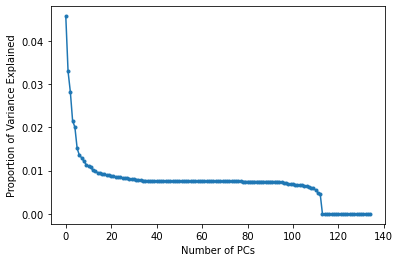

In [10]:
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA


# All possible components
my_pca = PCA(n_components=135)
my_pca.fit(X_train)

# transform data 
plot = my_pca.transform(X_train)

# assign variable as explained variance
expl_var = my_pca.explained_variance_ratio_

# plotting explained variance
plt.figure()

plt.plot(range(0, 135),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')

plt.show()

Dang. Even at 1 component, it only explains less than 5% of the variance. This is a bit concerning. It doesn't seem that PCA will benefit us here. That's okay, lets try to go ahead without it.

## Logistic Regression

Lets do a simple logistic regression to see how it performs.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fit logistic regression model
logistic_regression_model = LogisticRegression(max_iter = 10000)
logistic_regression_model.fit(X_train, y_train)
result = logistic_regression_model.fit(X_train, y_train)

# Scoring
train_prediction = logistic_regression_model.predict(X_train)
test_prediction = logistic_regression_model.predict(X_test)
accuracy_train = accuracy_score(train_prediction, y_train)
accuracy_test = accuracy_score(test_prediction, y_test)

print(f"Score on training set: {accuracy_train}")
print(f"Score on test set: {accuracy_test}")

Score on training set: 0.6461019638960523
Score on test set: 0.6358167515039334


## Decision Trees

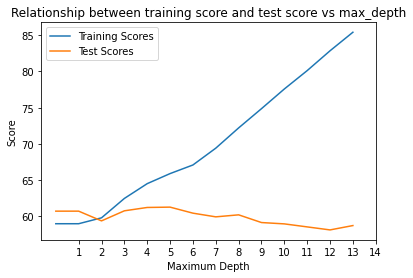

Best Accuracy Score: Max Depth of 6
Training accuracy of 65.9% (max_depth = 6)
Test accuracy of 61.27% (max_depth = 6)


In [35]:
from sklearn.tree import DecisionTreeClassifier

# lists for scoring
training_scores = []
test_scores = []

# finding optimal depth
for i in range(1,15):
    decision_tree = DecisionTreeClassifier(max_depth=i)
    decision_tree.fit(X_train, y_train)
    training_scores.append(decision_tree.score(X_train,y_train)*100)
    test_scores.append(decision_tree.score(X_test,y_test)*100)

# Plotting training and test scores against max_depth = i
plt.figure()

plt.plot(training_scores, label = 'Training Scores')
plt.plot(test_scores, label = 'Test Scores')
plt.xticks(range(1,15,1))
plt.title('Relationship between training score and test score vs max_depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Score')
plt.legend()

plt.show()

# Print best test score:
highest_score = max(test_scores)
highest_index = test_scores.index(highest_score)

print(f"Best Accuracy Score: Max Depth of {highest_index + 1}")
print(f"Training accuracy of {round(training_scores[highest_index], 2)}% (max_depth = {highest_index + 1})")
print(f"Test accuracy of {round(test_scores[highest_index],2)}% (max_depth = {highest_index + 1})")

## Neural Networks

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

I really wanted to play around with neural networks. My main goal is to try to beat my logistic regression. Firstly, I want to build a model with the number of features as my input layer. I will first start with a single hiddin layer, and then a single output neuron to see how it performs.

In [39]:
# How many input layers?
print(f"Number of features: {X_train.shape[1]}")

Number of features: 136


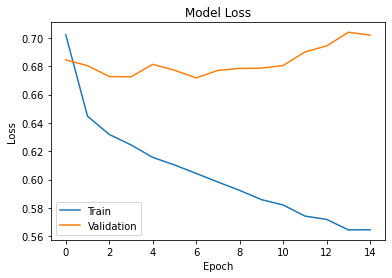

Train Accuracy: 0.7009
Test Accuracy: 0.6196


In [43]:
# Sequential Model
nn_model = keras.Sequential()


nn_model.add(layers.Dense(100, input_dim = 136, activation = 'relu'))


# Output layer of one layer
nn_model.add(layers.Dense(1, activation = 'sigmoid'))

# Compile Model
nn_model.compile(
    optimizer=keras.optimizers.Adam(),  
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()])

# Changing data to numpy arrays
X_train_nn = np.asarray(X_train)
y_train_nn = np.asarray(y_train)
X_test_nn = np.asarray(X_test)
y_test_nn = np.asarray(y_test)

# Train model
history = nn_model.fit(X_train_nn, y_train_nn, epochs=15, \
                       verbose=0, validation_data = (X_test_nn, y_test_nn))


# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = nn_model.evaluate(X_test_nn,y_test_nn, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}") 

# Generate predictions
predictions = nn_model.predict(X_test_nn)

Not too bad. Lets try adding more layers.

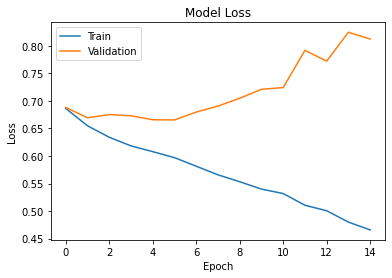

Train Accuracy: 0.7604
Test Accuracy: 0.6122


In [55]:
# Sequential Model
nn_model = keras.Sequential()


nn_model.add(layers.Dense(136, input_dim = 136, activation = 'relu'))
nn_model.add(layers.Dense(100, activation = 'relu'))
nn_model.add(layers.Dense(100, activation = 'relu'))
nn_model.add(layers.Dense(100, activation = 'relu'))


# Output layer of one layer
nn_model.add(layers.Dense(1, activation = 'sigmoid'))

# Compile Model
nn_model.compile(
    optimizer=keras.optimizers.Adam(),  
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()])

# Changing data to numpy arrays
X_train_nn = np.asarray(X_train)
y_train_nn = np.asarray(y_train)
X_test_nn = np.asarray(X_test)
y_test_nn = np.asarray(y_test)

# Train model
history = nn_model.fit(X_train_nn, y_train_nn, epochs=15, \
                       verbose=0, validation_data = (X_test_nn, y_test_nn))


# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = nn_model.evaluate(X_test_nn,y_test_nn, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}") 

# Generate predictions
predictions = nn_model.predict(X_test_nn)

As expected, it's overfitting too much. Lets fix this by adding a regularizer. 

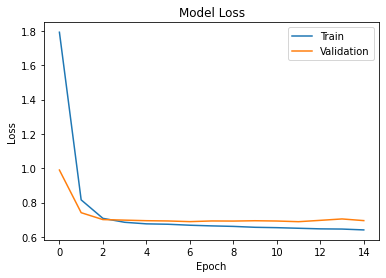

Train Accuracy: 0.6818
Test Accuracy: 0.6280


In [56]:
# Sequential Model
nn_model = keras.Sequential()

regularizer = keras.regularizers.l2(0.005)

nn_model.add(layers.Dense(136, input_dim = 136, activation = 'relu', kernel_regularizer=regularizer))
nn_model.add(layers.Dense(100, activation = 'relu', kernel_regularizer=regularizer))
nn_model.add(layers.Dense(100, activation = 'relu', kernel_regularizer=regularizer))
nn_model.add(layers.Dense(100, activation = 'relu', kernel_regularizer=regularizer))
nn_model.add(layers.Dense(50, activation = 'relu', kernel_regularizer=regularizer))

# Output layer of one layer
nn_model.add(layers.Dense(1, activation = 'sigmoid'))

# Compile Model
nn_model.compile(
    optimizer=keras.optimizers.Adam(),  
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()])

# Changing data to numpy arrays
X_train_nn = np.asarray(X_train)
y_train_nn = np.asarray(y_train)
X_test_nn = np.asarray(X_test)
y_test_nn = np.asarray(y_test)

# Train model
history = nn_model.fit(X_train_nn, y_train_nn, epochs=15, \
                       verbose=0, validation_data = (X_test_nn, y_test_nn))


# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = nn_model.evaluate(X_test_nn,y_test_nn, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}") 

# Generate predictions
predictions = nn_model.predict(X_test_nn)

How about dropouts? Will that help?

Train on 5041 samples, validate on 2161 samples
Epoch 1/25
5041/5041 [==============================] - 2s 496us/sample - loss: 0.6932 - binary_accuracy: 0.5037 - val_loss: 0.6931 - val_binary_accuracy: 0.5137
Epoch 2/25
5041/5041 [==============================] - 1s 231us/sample - loss: 0.6920 - binary_accuracy: 0.5142 - val_loss: 0.6862 - val_binary_accuracy: 0.5613
Epoch 3/25
5041/5041 [==============================] - 1s 238us/sample - loss: 0.6748 - binary_accuracy: 0.5826 - val_loss: 0.6671 - val_binary_accuracy: 0.6071
Epoch 4/25
5041/5041 [==============================] - 1s 240us/sample - loss: 0.6535 - binary_accuracy: 0.6154 - val_loss: 0.6692 - val_binary_accuracy: 0.6108
Epoch 5/25
5041/5041 [==============================] - 1s 233us/sample - loss: 0.6440 - binary_accuracy: 0.6308 - val_loss: 0.6673 - val_binary_accuracy: 0.6229
Epoch 6/25
5041/5041 [==============================] - 1s 237us/sample - loss: 0.6320 - binary_accuracy: 0.6427 - val_loss: 0.6661 - val_bina

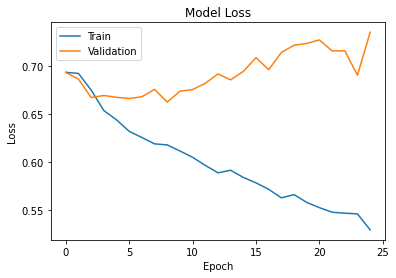

Train Accuracy: 0.7209
Test Accuracy: 0.6229


In [54]:

# Sequential Model
nn_model = keras.Sequential()


nn_model.add(layers.Dense(136, input_dim = 136, activation = 'relu'))
nn_model.add(layers.Dropout(0.2)) 
nn_model.add(layers.Dense(100, activation = 'relu'))
nn_model.add(layers.Dropout(0.2)) 
nn_model.add(layers.Dense(100, activation = 'relu'))
nn_model.add(layers.Dropout(0.2)) 
nn_model.add(layers.Dense(100, activation = 'relu'))
nn_model.add(layers.Dropout(0.2)) 
nn_model.add(layers.Dense(50, activation = 'relu'))
nn_model.add(layers.Dropout(0.2)) # 
nn_model.add(layers.Dense(2, activation = 'relu'))

# Output layer of one layer
nn_model.add(layers.Dense(1, activation = 'sigmoid'))

# Compile Model
nn_model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),  
    # Cross entropy loss function for classificaiton model
    loss=keras.losses.BinaryCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.BinaryAccuracy()]
)

# Changing data to numpy arrays

X_train_nn = np.asarray(X_train)
y_train_nn = np.asarray(y_train)
X_test_nn = np.asarray(X_test)
y_test_nn = np.asarray(y_test)

# train model
history = nn_model.fit(X_train_nn, y_train_nn, epochs=25, \
                       verbose=1, validation_data = (X_test_nn, y_test_nn))


# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = nn_model.evaluate(X_test_nn,y_test_nn, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}") 

# Generate predictions
predictions = nn_model.predict(X_test_nn)

This notebook doesn't show it, but I've tried far too many neural network structures, more than I'd like to admit. Lets move on.

## Adaptive Boosting

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


AB_model = AdaBoostClassifier(n_estimators = 50)


AB_model.fit(X_train, y_train)


print("Scores:")
print(f"AdaBoost Training score: {AB_model.score(X_train,y_train)}")
print(f"AdaBoost Testing score: {AB_model.score(X_test,y_test)}")


Scores:
AdaBoost Training score: 0.6474905772664153
AdaBoost Testing score: 0.6325775104118464


## Extreme Gradient Boosting

In [59]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(max_depth = 3, min_child_weight = 0.9,
                         learning_rate = 0.3)
XGB_model.fit(X_train, y_train)


print("Scores:")
print(f"XGBoost Training score: {XGB_model.score(X_train,y_train)}")
print(f"XGBoost Testing score: {XGB_model.score(X_test,y_test)}")



Scores:
XGBoost Training score: 0.7272366593929775
XGBoost Testing score: 0.6422952336881074


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


grad_boost_model = GradientBoostingClassifier()
grad_boost_model.fit(X_train, y_train)

print("Scores:")
print(f"Gradient Boosting Training score: {grad_boost_model.score(X_train,y_train)}")
print(f"Gradient Boosting Testing score: {grad_boost_model.score(X_test,y_test)}")

Woah! Boosting seems to really work with this dataset. I'm going to choose to move on with Gradient Boosting, and do some hyper parameter tuning.

#### Tuning  `learning_rate`

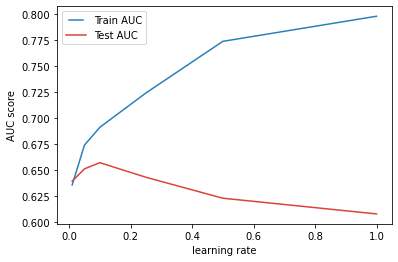

In [61]:
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D

learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []


for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
# Plot AUC curves    
plt.figure()    

line1, = plt.plot(learning_rates, train_results, '#2980B9', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, '#DC4238', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')

plt.show()

#### Tuning `n_estimators`

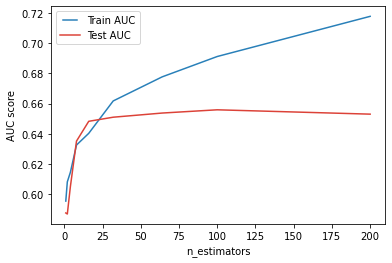

In [62]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

# Plot AUC Curves
plt.figure()

line1, = plt.plot(n_estimators, train_results, '#2980B9', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, '#DC4238', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')

plt.show()

#### Tuning `max_depth`

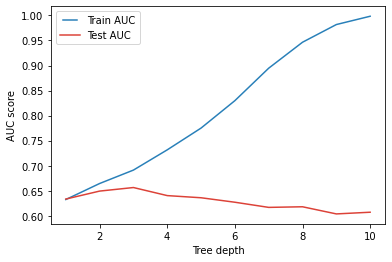

In [64]:
max_depths = np.linspace(1, 10, 10, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

# Plotting AUC curves
plt.figure()

line1, = plt.plot(max_depths, train_results, '#2980B9', label='Train AUC')
line2, = plt.plot(max_depths, test_results, '#DC4238', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')

plt.show()

#### Tuning `min_samples_splits`

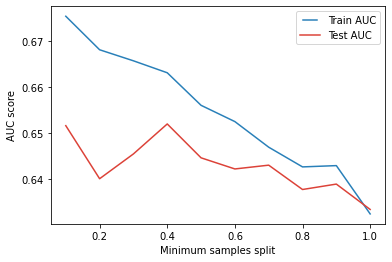

In [65]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   model = GradientBoostingClassifier(min_samples_split=min_samples_split)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

# Plotting AUC curves
plt.figure()

line1, = plt.plot(min_samples_splits, train_results, '#2980B9', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, '#DC4238', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Minimum samples split')

plt.show()

#### Tuning `min_samples_leaf`

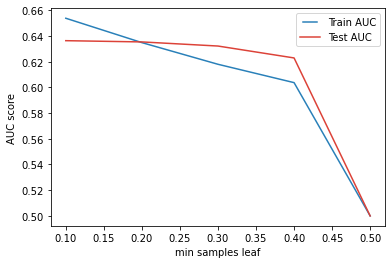

In [66]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
   model = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
# Plotting AUC curves
plt.figure()

line1, = plt.plot(min_samples_leafs, train_results, '#2980B9', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, '#DC4238', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')

plt.show()

#### Tuning `max_features`

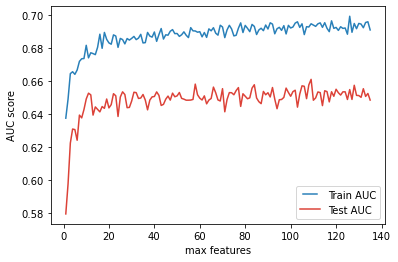

In [88]:
max_features = list(range(1,136))
train_results = []
test_results = []

for max_feature in max_features:
   model = GradientBoostingClassifier(max_features=max_feature)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
# Plot AUC Curves
plt.figure()

line1, = plt.plot(max_features, train_results, '#2980B9', label='Train AUC')
line2, = plt.plot(max_features, test_results, '#DC4238', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')

plt.show()

What did we learn? The following parameters should optimize our model:

- `learning_rate` = 0.1
- `n_estimators` = 150
- `min_samples_leaf` = 0.01
- `max_features` = 30
- `max_depth` = 3

## Making Predictions

To make this model useful, I want to create a few data points and predict it. Lets pull a few datapoints from the data and make it what I want.

In [ ]:
# IN PROGRESS.